In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
def converged(df):
    return df["loss"].iloc[-1] <= -0.999

In [3]:
csvfiles = Path("tmp").glob("*.csv")

initial_params = []
for csvfile in csvfiles:
    df = pd.read_csv(csvfile)
    df["runtime"] = df["time"].cumsum()
    df["converged"] = converged(df)
    initial_params.append(df.iloc[0])

df = pd.concat(initial_params, axis=1).T
df.reset_index(inplace=True, drop=True)
df.head()

,itr,time,loss,theta,phi,gamma,bx,by,bz,runtime,converged
0,0,0.01678,-0.400432,3.672567,-0.900846,2.616086,176.116455,201.838211,146.941849,0.01678,False
1,0,0.0159,-0.569991,3.542065,-0.956831,2.440757,162.839005,176.124084,187.588211,0.0159,False
2,0,0.016207,-0.383127,2.947454,0.560608,2.378124,205.101318,177.382675,159.940262,0.016207,False
3,0,0.016143,-0.533324,2.715019,0.217694,0.722779,158.374847,198.109009,172.611084,0.016143,True
4,0,0.015803,-0.537636,3.152865,-0.268569,2.111112,188.304382,181.735489,163.621521,0.015803,True


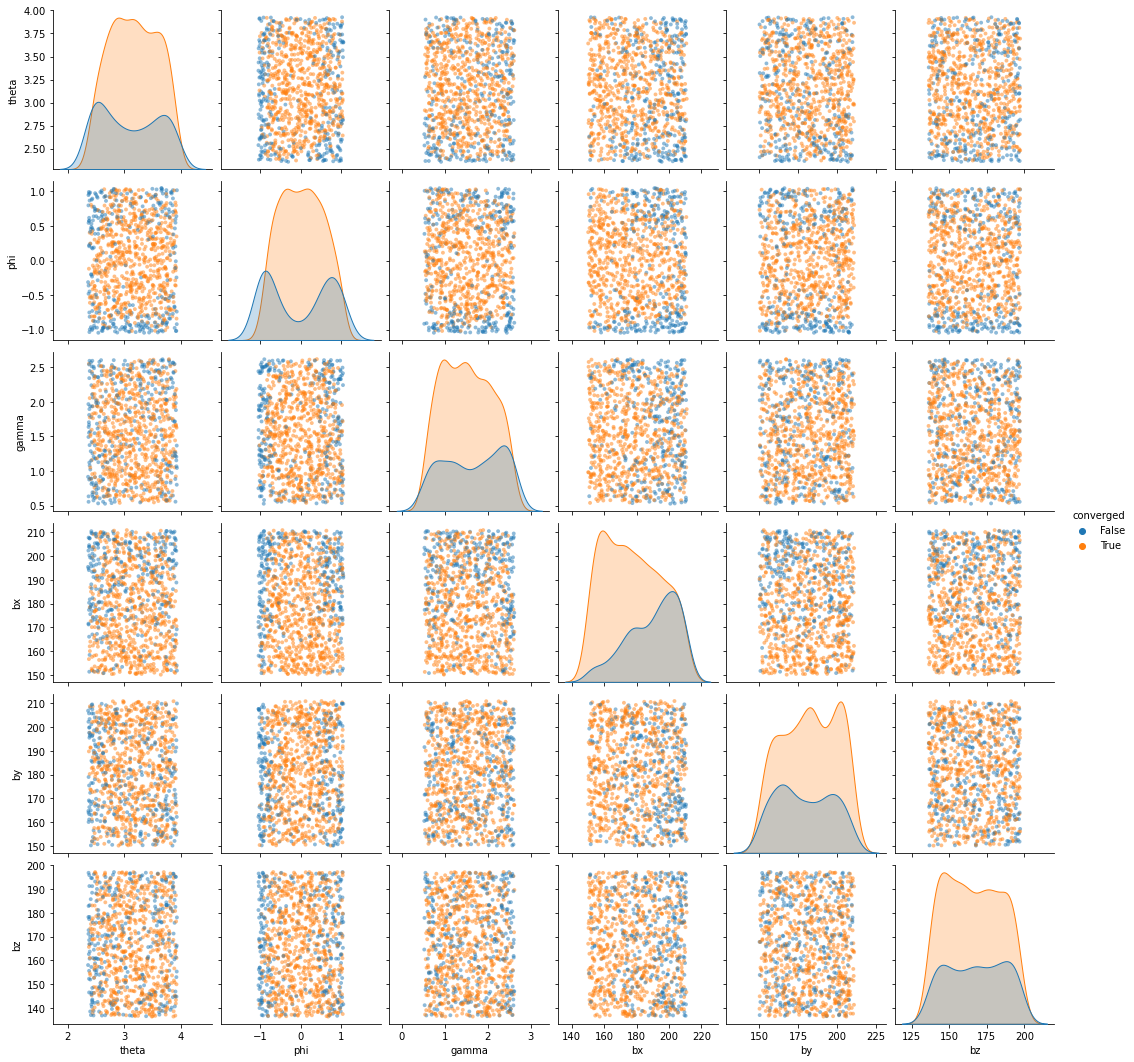

In [4]:
plot_kws = dict(alpha=0.5, s=15, linewidth=0, marker="o")
sns.pairplot(df[["theta", "phi", "gamma", "bx", "by", "bz", "converged"]], hue="converged", plot_kws=plot_kws)
plt.show()

In [5]:
csvfiles = Path("tmp").glob("*.csv")

initial_params = []
for csvfile in csvfiles:
    df = pd.read_csv(csvfile)
    df["runtime"] = df["time"].cumsum()
    df["converged"] = converged(df)
    initial_params.append(df.iloc[0])

df = pd.concat(initial_params, axis=1).T
df.reset_index(inplace=True, drop=True)
df.head()

,itr,time,loss,theta,phi,gamma,bx,by,bz,runtime,converged
0,0,0.01678,-0.400432,3.672567,-0.900846,2.616086,176.116455,201.838211,146.941849,0.01678,False
1,0,0.0159,-0.569991,3.542065,-0.956831,2.440757,162.839005,176.124084,187.588211,0.0159,False
2,0,0.016207,-0.383127,2.947454,0.560608,2.378124,205.101318,177.382675,159.940262,0.016207,False
3,0,0.016143,-0.533324,2.715019,0.217694,0.722779,158.374847,198.109009,172.611084,0.016143,True
4,0,0.015803,-0.537636,3.152865,-0.268569,2.111112,188.304382,181.735489,163.621521,0.015803,True


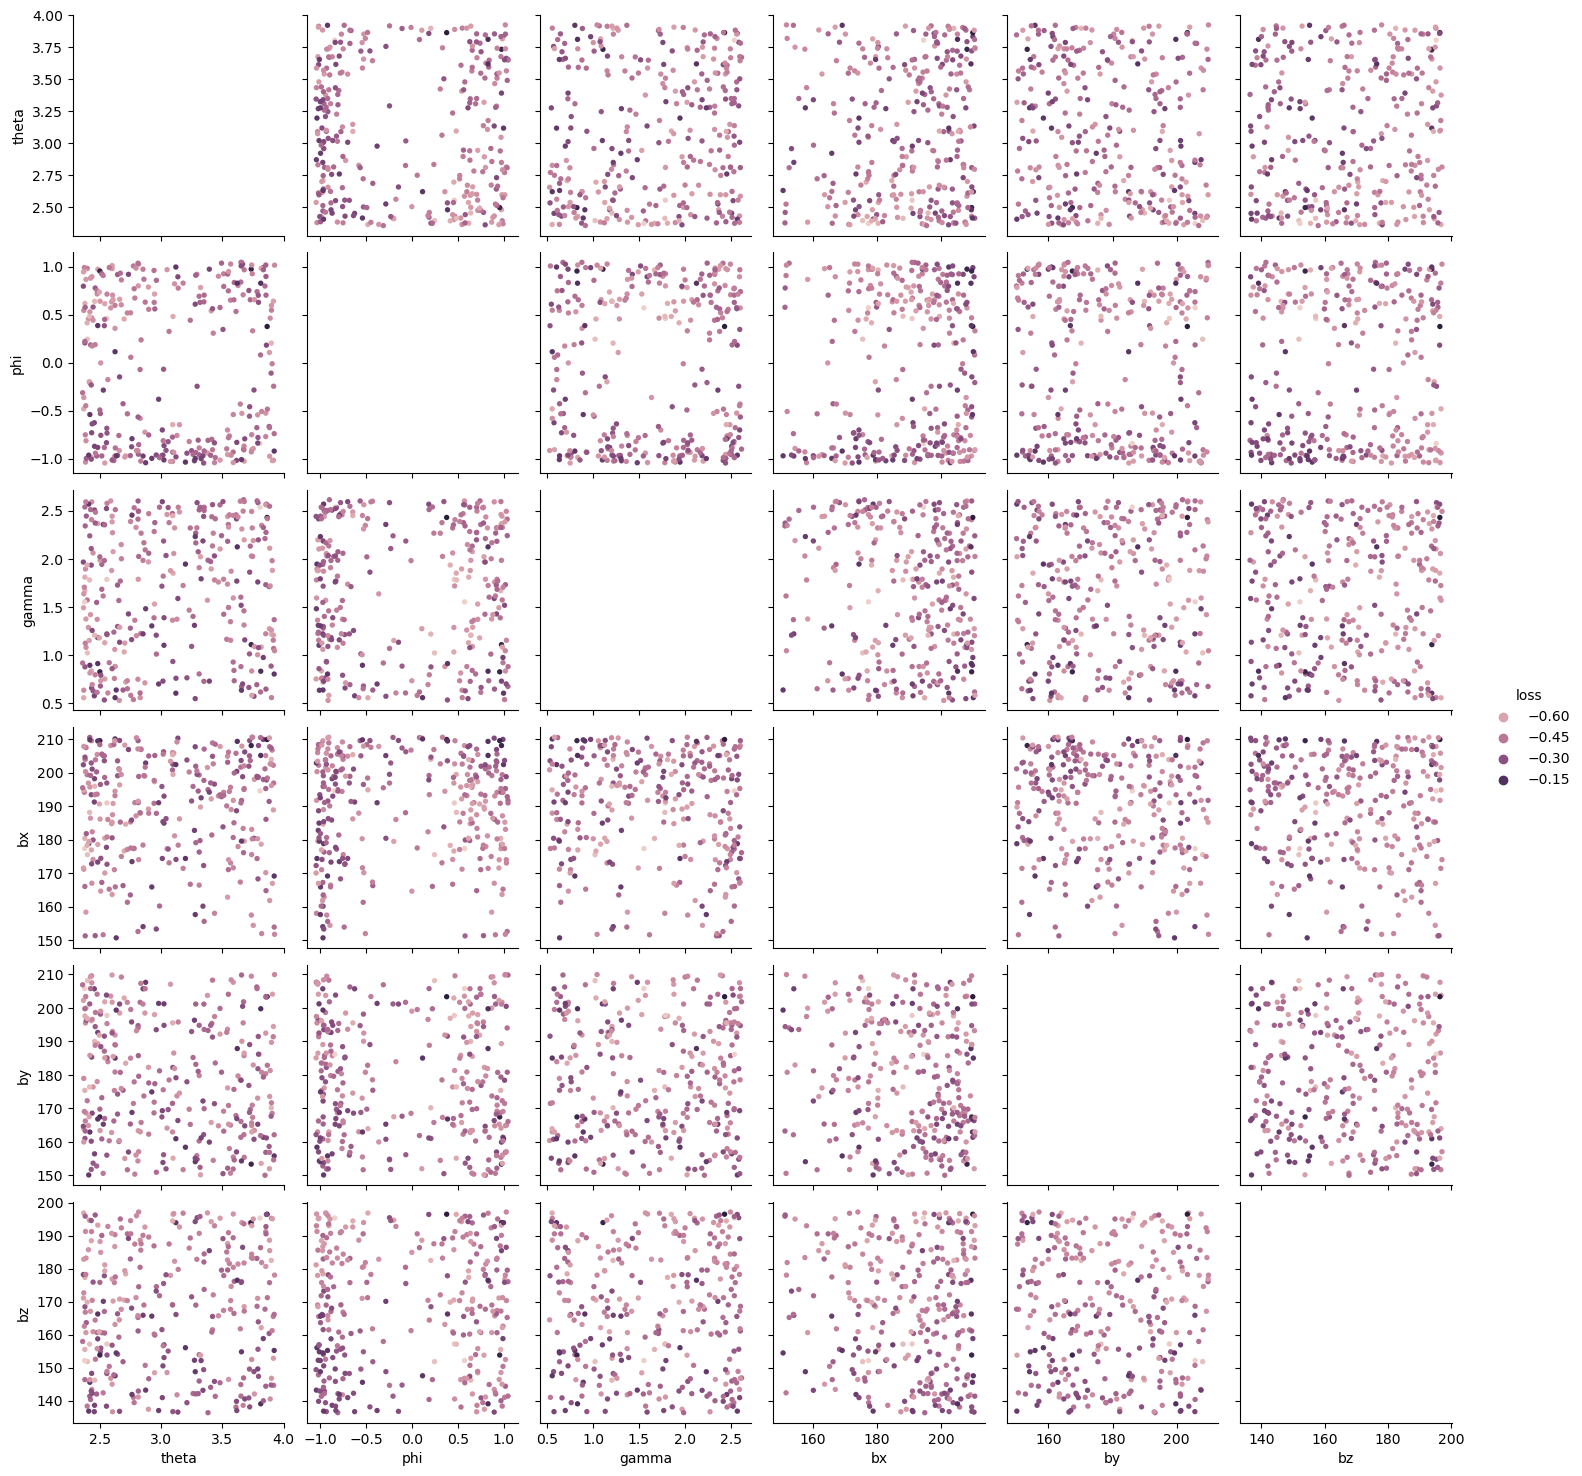

In [6]:
plot_kws = dict(s=15, linewidth=0, marker="o")

sns.pairplot(
    df.query("converged == False")[["theta", "phi", "gamma", "bx", "by", "bz", "loss"]],
    hue="loss",
    plot_kws=plot_kws
)
plt.show()